# Data exploration

In [1]:
import pandas as pd
import numpy as np
import holoviews as hv
import nltk
from nltk.parse import CoreNLPParser
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords as sw
import re
import chartify
from itertools import combinations, permutations
import operator
import bokeh.io
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, CustomJS, Rect, Slider, LinearColorMapper, ColorBar, HoverTool, Legend
from bokeh.models.tools import CustomJSHover
from bokeh.layouts import widgetbox, row, column
from bokeh.models.widgets import RangeSlider, CheckboxGroup, TextInput
from bokeh.palettes import Spectral, Dark2, Viridis5, Plasma5, Cividis5, Viridis256, Cividis256, Cividis10
import colorcet as cc
import seaborn as sns
import matplotlib.pyplot as plt
# hv.extension('matplotlib')

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
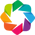

In [2]:
hv.notebook_extension('bokeh')

In [3]:
bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

###  Load data

In [4]:
aspects = np.array(['comments','RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'CLARITY', 'ORIGINALITY'])

aspects_with_comments = np.array(['comments','RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'CLARITY', 'ORIGINALITY'])

aspects_with_comments_ids = np.array(['PAPER_ID', 'comments','RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'CLARITY', 'ORIGINALITY'])

aspects_with_comments_no_approp = np.array(['comments','RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY'])

aspects_no_comments = np.array(['RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'CLARITY', 'ORIGINALITY'])
aspects_with_conference_no_comments = np.array(['CONFERENCE','RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'APPROPRIATENESS', 'CLARITY', 'ORIGINALITY'])

aspects_no_com_approp = np.array(['RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY'])

aspects_with_comments_abstract_no_approp = np.array(['comments', 'ABSTRACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY'])

aspects_with_abstract_no_com_approp = np.array(['ABSTRACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY'])

aspects_truncated_no_com = np.array(['RECOM', 'CONFIDENCE', 'CORRECT', 'IMPACT', 'SUBSTANCE', 'APPROP', 'CLARITY', 'ORIGINALITY'])

aspects_truncated_no_com_approp = np.array(['RECOM', 'CONFIDENCE', 'CORRECT', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY'])

aspects_with_comments_conf_no_approp = np.array(['comments','RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY', 'CONFERENCE'])

venues = ['acl', 'iclr', 'conll']

### Read data 

In [5]:
train_dataset = pd.read_csv('train_reviews.csv')
print("Total number of train reviews:", len(train_dataset))

dev_dataset = pd.read_csv('dev_reviews.csv')
print("Total number of dev reviews:", len(dev_dataset))

test_dataset = pd.read_csv('test_reviews.csv')
print("Total number of test reviews:", len(test_dataset))

Total number of train reviews: 6221
Total number of dev reviews: 697
Total number of test reviews: 666


In [6]:
train_dataset.head()

IMPACT  SUBSTANCE  APPROPRIATENESS  MEANINGFUL_COMPARISON  \
0     3.0        2.0              5.0                    3.0   
1     3.0        3.0              5.0                    3.0   
2     4.0        4.0              5.0                    4.0   
3     3.0        5.0              5.0                    3.0   
4     3.0        4.0              5.0                    4.0   

  PRESENTATION_FORMAT                                           comments  \
0              Poster  This paper compares different ways of inducing...   
1              Poster  - Strengths: An interesting and comprehensive ...   
2              Poster  - Strengths:\n\n - The paper is clearly writte...   
3   Oral Presentation  - Strengths:\n\nWhen introducing the task, the...   
4   Oral Presentation  - Strengths:\n\noriginality of the CORE evalua...   

   SOUNDNESS_CORRECTNESS  ORIGINALITY  is_meta_review  RECOMMENDATION  \
0                    5.0          5.0             NaN             2.0   
1                    5.0          5.0             NaN             3.0   
2                    3.0          3.0             NaN             4.0   
3                    3.0          3.0             NaN             5.0   
4                    4.0          4.0             NaN             4.0   

      ...       CONFERENCE                                           ABSTRACT  \
0     ...              acl  Current state-of-the-art sentiment analysis te...   
1     ...              acl  Current state-of-the-art sentiment analysis te...   
2     ...              acl  Neural networks have recently shown promising ...   
3     ...              acl  Joint extraction of entities and relations is ...   
4     ...              acl  Text similarity measures are used in multiple ...   

  PAPER_ID REPLICABILITY  IS_META_REVIEW  DATE TITLE OTHER_KEYS  \
0      266           NaN             NaN   NaN   NaN        NaN   
1      266           NaN             NaN   NaN   NaN        NaN   
2      557           NaN             NaN   NaN   NaN        NaN   
3      222           NaN             NaN   NaN   NaN        NaN   
4      805           NaN             NaN   NaN   NaN        NaN   

  RECOMMENDATION_UNOFFICIAL IS_ANNOTATED  
0                       NaN          NaN  
1                       NaN          NaN  
2                       NaN          NaN  
3                       NaN          NaN  
4                       NaN          NaN  

[5 rows x 22 columns]

### Data cleaning 

In [7]:
def clean_dataset(dataset):
    # drop duplicates per paper
    dataset = dataset.drop_duplicates(aspects_with_comments_ids)
    
    # drop rows with comments == Nan
    dataset = dataset.dropna(subset=['comments'])
    
    # drop rows where all aspects == Nan
    dataset = dataset.dropna(subset=aspects_no_comments, how='all')
    
    return dataset 

In [8]:
def dataset_freq(dataset, dataset_type):
    return [dataset_type] + [len(dataset[dataset.CONFERENCE==venue]) for venue in venues]

def df_freq():
    freq = [dataset_freq(train_dataset, 'train'),
            dataset_freq(dev_dataset, 'dev'),
            dataset_freq(test_dataset, 'test')]

    return pd.DataFrame(freq, columns = [''] + venues)

In [9]:
df_freq()

acl  iclr  conll
0  train  248  5940     33
1    dev   12   684      1
2   test   15   646      5

In [10]:
train_dataset = clean_dataset(train_dataset)
dev_dataset = clean_dataset(dev_dataset)
test_dataset = clean_dataset(test_dataset)

In [11]:
df_freq()

acl  iclr  conll
0  train  248  1094     33
1    dev   12   123      1
2   test   15   115      5

### Normalize grades scale 

In [12]:
def print_grades_scale(dataset, dataset_type):
    print(dataset_type, "grade scales")
    print('ACL recommendation range: max',dataset[dataset.CONFERENCE=='acl'].RECOMMENDATION.max(),'min',dataset[dataset.CONFERENCE=='acl'].RECOMMENDATION.min())
    print('ICLR recommendation range: max',dataset[dataset.CONFERENCE=='iclr'].RECOMMENDATION.max(),'min',dataset[dataset.CONFERENCE=='iclr'].RECOMMENDATION.min())
    print('CONLL recommendation range: max',dataset[dataset.CONFERENCE=='conll'].RECOMMENDATION.max(),'min',dataset[dataset.CONFERENCE=='conll'].RECOMMENDATION.min())
    print()

In [13]:
print_grades_scale(train_dataset, 'train')
print_grades_scale(dev_dataset, 'dev')
print_grades_scale(test_dataset, 'test')

train grade scales
ACL recommendation range: max 5.0 min 1.0
ICLR recommendation range: max 10.0 min 1.0
CONLL recommendation range: max 5.0 min 1.0

dev grade scales
ACL recommendation range: max 4.0 min 2.0
ICLR recommendation range: max 9.0 min 2.0
CONLL recommendation range: max 4.0 min 4.0

test grade scales
ACL recommendation range: max 4.0 min 2.0
ICLR recommendation range: max 8.0 min 2.0
CONLL recommendation range: max 4.0 min 3.0



In [15]:
def norm_grade(grade):
    new_grade = 0.    
    if 0. <= grade <= 2.:
        new_grade = 1.
    elif 2. < grade <= 4.:
        new_grade = 2.
    elif 4. < grade <= 6.:
        new_grade = 3.
    elif 6. < grade <= 8.:
        new_grade = 4.
    elif 8. < grade <= 10.:
        new_grade = 5.
    else:
        new_grade = np.nan
    return new_grade

In [16]:
def norm_grades_scale(dataset, vfunc):
    dataset.loc[dataset.CONFERENCE=='iclr','RECOMMENDATION'] = vfunc(dataset[dataset.CONFERENCE=='iclr'].RECOMMENDATION)
    return dataset

In [17]:
vfunc = np.vectorize(norm_grade)
train_dataset = norm_grades_scale(train_dataset, vfunc)
dev_dataset = norm_grades_scale(dev_dataset, vfunc)
test_dataset = norm_grades_scale(test_dataset, vfunc)

In [18]:
print_grades_scale(train_dataset, 'train')
print_grades_scale(dev_dataset, 'dev')
print_grades_scale(test_dataset, 'test')

train grade scales
ACL recommendation range: max 5.0 min 1.0
ICLR recommendation range: max 5.0 min 1.0
CONLL recommendation range: max 5.0 min 1.0

dev grade scales
ACL recommendation range: max 4.0 min 2.0
ICLR recommendation range: max 5.0 min 1.0
CONLL recommendation range: max 4.0 min 4.0

test grade scales
ACL recommendation range: max 4.0 min 2.0
ICLR recommendation range: max 4.0 min 1.0
CONLL recommendation range: max 4.0 min 3.0



In [19]:
pd.set_option('display.max_columns', 500)

In [20]:
train_dataset.head()

IMPACT  SUBSTANCE  APPROPRIATENESS  MEANINGFUL_COMPARISON  \
0     3.0        2.0              5.0                    3.0   
1     3.0        3.0              5.0                    3.0   
2     4.0        4.0              5.0                    4.0   
3     3.0        5.0              5.0                    3.0   
4     3.0        4.0              5.0                    4.0   

  PRESENTATION_FORMAT                                           comments  \
0              Poster  This paper compares different ways of inducing...   
1              Poster  - Strengths: An interesting and comprehensive ...   
2              Poster  - Strengths:\n\n - The paper is clearly writte...   
3   Oral Presentation  - Strengths:\n\nWhen introducing the task, the...   
4   Oral Presentation  - Strengths:\n\noriginality of the CORE evalua...   

   SOUNDNESS_CORRECTNESS  ORIGINALITY  is_meta_review  RECOMMENDATION  \
0                    5.0          5.0             NaN             2.0   
1                    5.0          5.0             NaN             3.0   
2                    3.0          3.0             NaN             4.0   
3                    3.0          3.0             NaN             5.0   
4                    4.0          4.0             NaN             4.0   

   CLARITY  REVIEWER_CONFIDENCE CONFERENCE  \
0      4.0                  3.0        acl   
1      5.0                  4.0        acl   
2      5.0                  5.0        acl   
3      5.0                  5.0        acl   
4      5.0                  3.0        acl   

                                            ABSTRACT  PAPER_ID  REPLICABILITY  \
0  Current state-of-the-art sentiment analysis te...       266            NaN   
1  Current state-of-the-art sentiment analysis te...       266            NaN   
2  Neural networks have recently shown promising ...       557            NaN   
3  Joint extraction of entities and relations is ...       222            NaN   
4  Text similarity measures are used in multiple ...       805            NaN   

  IS_META_REVIEW DATE TITLE OTHER_KEYS  RECOMMENDATION_UNOFFICIAL IS_ANNOTATED  
0            NaN  NaN   NaN        NaN                        NaN          NaN  
1            NaN  NaN   NaN        NaN                        NaN          NaN  
2            NaN  NaN   NaN        NaN                        NaN          NaN  
3            NaN  NaN   NaN        NaN                        NaN          NaN  
4            NaN  NaN   NaN        NaN                        NaN          NaN

In [21]:
len(train_dataset)

1375

### ICLR stats

In [23]:
iclr_papers = train_dataset[train_dataset.CONFERENCE=='iclr']
aspect_idx = np.arange(len(aspects_with_comments))
aspect_idx_combinations = [list(combinations(aspect_idx, i+1)) for i in aspect_idx]

In [23]:
print("Total iclr papers:", iclr_papers.shape[0])
print()

for i in np.arange(len(aspect_idx_combinations)):
    print("Number of aspects:", i+1)
    for j in np.arange(len(aspect_idx_combinations[i])):
        aspects_combination = sorted(aspects[list(aspect_idx_combinations[i][j])])
        nr_aspects_combination = iclr_papers.dropna(subset=aspects_combination).shape[0]
        if nr_aspects_combination > 0:
            print(aspects_combination, ":", nr_aspects_combination)
    print()

Total iclr papers: 1094

Number of aspects: 1
['comments'] : 1094
['RECOMMENDATION'] : 1083
['REVIEWER_CONFIDENCE'] : 1071
['SOUNDNESS_CORRECTNESS'] : 97
['IMPACT'] : 68
['SUBSTANCE'] : 60
['APPROPRIATENESS'] : 12
['CLARITY'] : 100
['ORIGINALITY'] : 118

Number of aspects: 2
['RECOMMENDATION', 'comments'] : 1083
['REVIEWER_CONFIDENCE', 'comments'] : 1071
['SOUNDNESS_CORRECTNESS', 'comments'] : 97
['IMPACT', 'comments'] : 68
['SUBSTANCE', 'comments'] : 60
['APPROPRIATENESS', 'comments'] : 12
['CLARITY', 'comments'] : 100
['ORIGINALITY', 'comments'] : 118
['RECOMMENDATION', 'REVIEWER_CONFIDENCE'] : 1071
['RECOMMENDATION', 'SOUNDNESS_CORRECTNESS'] : 93
['IMPACT', 'RECOMMENDATION'] : 65
['RECOMMENDATION', 'SUBSTANCE'] : 58
['APPROPRIATENESS', 'RECOMMENDATION'] : 11
['CLARITY', 'RECOMMENDATION'] : 96
['ORIGINALITY', 'RECOMMENDATION'] : 112
['REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS'] : 91
['IMPACT', 'REVIEWER_CONFIDENCE'] : 65
['REVIEWER_CONFIDENCE', 'SUBSTANCE'] : 57
['APPROPRIATENESS'

['IMPACT', 'ORIGINALITY', 'SOUNDNESS_CORRECTNESS', 'comments'] : 14
['CLARITY', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE', 'comments'] : 8
['ORIGINALITY', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE', 'comments'] : 11
['APPROPRIATENESS', 'CLARITY', 'SOUNDNESS_CORRECTNESS', 'comments'] : 1
['APPROPRIATENESS', 'ORIGINALITY', 'SOUNDNESS_CORRECTNESS', 'comments'] : 3
['CLARITY', 'ORIGINALITY', 'SOUNDNESS_CORRECTNESS', 'comments'] : 17
['CLARITY', 'IMPACT', 'SUBSTANCE', 'comments'] : 12
['IMPACT', 'ORIGINALITY', 'SUBSTANCE', 'comments'] : 19
['APPROPRIATENESS', 'CLARITY', 'IMPACT', 'comments'] : 2
['CLARITY', 'IMPACT', 'ORIGINALITY', 'comments'] : 15
['CLARITY', 'ORIGINALITY', 'SUBSTANCE', 'comments'] : 15
['APPROPRIATENESS', 'CLARITY', 'ORIGINALITY', 'comments'] : 1
['IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS'] : 33
['RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE'] : 23
['APPROPRIATENESS', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_C

['CLARITY', 'IMPACT', 'ORIGINALITY', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS'] : 6
['CLARITY', 'ORIGINALITY', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE'] : 4
['CLARITY', 'IMPACT', 'ORIGINALITY', 'REVIEWER_CONFIDENCE', 'SUBSTANCE'] : 9
['CLARITY', 'IMPACT', 'ORIGINALITY', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE'] : 3

Number of aspects: 6
['IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE', 'comments'] : 13
['APPROPRIATENESS', 'IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'comments'] : 1
['CLARITY', 'IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'comments'] : 17
['IMPACT', 'ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'comments'] : 14
['CLARITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE', 'comments'] : 8
['ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE', 'comme

##### Sorted by nr of reviews

In [24]:
print("Total iclr papers:", iclr_papers.shape[0])
print()
aspect_dicts = []
for i in np.arange(len(aspect_idx_combinations)):
    print("Number of aspects:", i+1)
    aspect_dict = dict()
    for j in np.arange(len(aspect_idx_combinations[i])):
        aspects_combination = sorted(aspects_with_comments[list(aspect_idx_combinations[i][j])])
        nr_aspects_combination = iclr_papers.dropna(subset=aspects_combination).shape[0]
        if nr_aspects_combination > 0:
            aspect_dict[tuple(aspects_combination)] = nr_aspects_combination
    aspect_dict = sorted(aspect_dict.items(), key=lambda kv: kv[1], reverse=True)
    aspect_dicts.append(aspect_dict)
    for i in aspect_dict:
        print(list(i[0]), ":", i[1])
    print()

Total iclr papers: 1094

Number of aspects: 1
['comments'] : 1094
['RECOMMENDATION'] : 1083
['REVIEWER_CONFIDENCE'] : 1071
['ORIGINALITY'] : 118
['CLARITY'] : 100
['SOUNDNESS_CORRECTNESS'] : 97
['IMPACT'] : 68
['SUBSTANCE'] : 60
['APPROPRIATENESS'] : 12

Number of aspects: 2
['RECOMMENDATION', 'comments'] : 1083
['REVIEWER_CONFIDENCE', 'comments'] : 1071
['RECOMMENDATION', 'REVIEWER_CONFIDENCE'] : 1071
['ORIGINALITY', 'comments'] : 118
['ORIGINALITY', 'RECOMMENDATION'] : 112
['ORIGINALITY', 'REVIEWER_CONFIDENCE'] : 110
['CLARITY', 'comments'] : 100
['SOUNDNESS_CORRECTNESS', 'comments'] : 97
['CLARITY', 'RECOMMENDATION'] : 96
['CLARITY', 'REVIEWER_CONFIDENCE'] : 96
['RECOMMENDATION', 'SOUNDNESS_CORRECTNESS'] : 93
['REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS'] : 91
['IMPACT', 'comments'] : 68
['IMPACT', 'RECOMMENDATION'] : 65
['IMPACT', 'REVIEWER_CONFIDENCE'] : 65
['SUBSTANCE', 'comments'] : 60
['RECOMMENDATION', 'SUBSTANCE'] : 58
['REVIEWER_CONFIDENCE', 'SUBSTANCE'] : 57
['CLARITY', '

['CLARITY', 'ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'comments'] : 45
['CLARITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'comments'] : 43
['ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'comments'] : 38
['IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'comments'] : 33
['IMPACT', 'ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'comments'] : 33
['ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SUBSTANCE', 'comments'] : 33
['CLARITY', 'IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'comments'] : 32
['IMPACT', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SUBSTANCE', 'comments'] : 24
['RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS', 'SUBSTANCE', 'comments'] : 23
['CLARITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE', 'SUBSTANCE', 'comments'] : 21
['IMPACT', 'ORIGINALITY', 'RECOMMENDATION', 'SUBSTANCE', 'comments'] : 18
['IMPACT', 'ORIGINALITY', 'REVIEWER_CONF

##### Filtered by aspect

In [22]:
aspect = 'ORIGINALITY'
print("Details for: ", aspect)
print()

single_aspect_dicts = []

for idx, combination_group in enumerate(aspect_dicts):
    single_aspect_dict = dict()
    print("Number of aspects:", idx+1)
    for combination_item in combination_group:
        combination_key = combination_item[0] 
        combination_value = combination_item[1]
        if aspect in combination_key:
            single_aspect_dict[tuple(combination_key)] = combination_value
            print(combination_key, ":", combination_value)
    single_aspect_dicts.append(single_aspect_dict)
    print()

Details for:  ORIGINALITY

Number of aspects: 1
('ORIGINALITY',) : 202

Number of aspects: 2
('ORIGINALITY', 'comments') : 118
('ORIGINALITY', 'RECOMMENDATION') : 112
('ORIGINALITY', 'REVIEWER_CONFIDENCE') : 110
('CLARITY', 'ORIGINALITY') : 80
('ORIGINALITY', 'SOUNDNESS_CORRECTNESS') : 71
('ORIGINALITY', 'SUBSTANCE') : 60
('IMPACT', 'ORIGINALITY') : 58
('APPROPRIATENESS', 'ORIGINALITY') : 8

Number of aspects: 3
('ORIGINALITY', 'RECOMMENDATION', 'comments') : 112
('ORIGINALITY', 'REVIEWER_CONFIDENCE', 'comments') : 110
('ORIGINALITY', 'RECOMMENDATION', 'REVIEWER_CONFIDENCE') : 110
('CLARITY', 'ORIGINALITY', 'comments') : 45
('CLARITY', 'ORIGINALITY', 'RECOMMENDATION') : 45
('CLARITY', 'ORIGINALITY', 'REVIEWER_CONFIDENCE') : 45
('ORIGINALITY', 'SOUNDNESS_CORRECTNESS', 'comments') : 42
('ORIGINALITY', 'RECOMMENDATION', 'SOUNDNESS_CORRECTNESS') : 40
('ORIGINALITY', 'REVIEWER_CONFIDENCE', 'SOUNDNESS_CORRECTNESS') : 38
('IMPACT', 'ORIGINALITY', 'comments') : 35
('ORIGINALITY', 'SUBSTANCE', 

In [23]:
# past_seq = set()
# past_paths = []
# def relation_finder(idx, sequence, parent):
#     if idx < len(single_aspect_dicts):
#         for k, v in single_aspect_dicts[idx].items():
#             if v >= 50:
#                 next_element_seq = list(set(k) - set(sequence))
#                 if len(next_element_seq) == 1 and tuple(sorted(sequence + next_element_seq)) not in past_seq:
#                     path = parent + str(idx-1), "->", next_element_seq[0]+ str(idx)
#                     if path not in past_paths:
#                         print(parent + str(idx-1), "->", next_element_seq[0]+ str(idx), "[label =", v, "];")
#                         past_paths.append(path)
#                         past_seq.add(tuple(sequence + next_element_seq))
#                     relation_finder(idx+1, sorted(sequence + next_element_seq), next_element_seq[0])

In [24]:
# http://www.webgraphviz.com/
# print("digraph g{rankdir=TD;")
# relation_finder(1, [aspect], aspect)
# print("}")

In [30]:
aspect_dicts[0]

[(('comments',), 1094),
 (('RECOMMENDATION',), 1083),
 (('REVIEWER_CONFIDENCE',), 1071),
 (('ORIGINALITY',), 118),
 (('CLARITY',), 100),
 (('SOUNDNESS_CORRECTNESS',), 97),
 (('IMPACT',), 68),
 (('SUBSTANCE',), 60),
 (('APPROPRIATENESS',), 12)]

In [36]:
iclr_freq_dict = {'comments' : [1094],
                  'RECOMMENDATION' : [1083],
                  'CONFIDENCE' : [1071],
                  'ORIGINALITY' : [118],
                  'CLARITY' : [100],
                  'CORRECTNESS' : [97],
                  'IMPACT' : [68],
                  'SUBSTANCE' : [60],
                  'APPROPRIATENESS' : [12]}

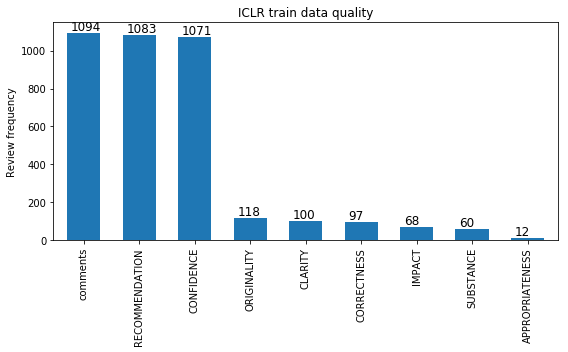

In [80]:
ax = pd.DataFrame.from_dict(iclr_freq_dict, orient="index").plot.bar(figsize=(8, 5), width=0.6, legend=False, title="ICLR train data quality")
plt.ylabel('Review frequency')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.07, p.get_height() + 15), fontsize=12)
plt.tight_layout()
plt.savefig("iclrtraindataquality.jpg", dpi=300)

### Venue stats

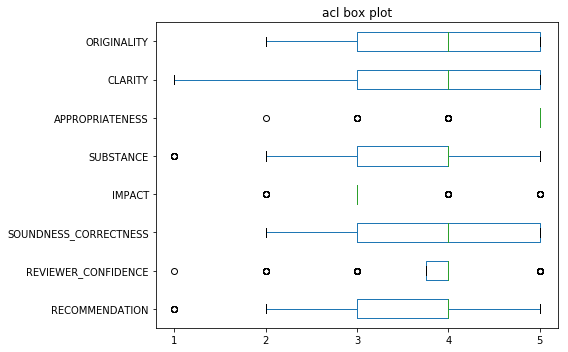

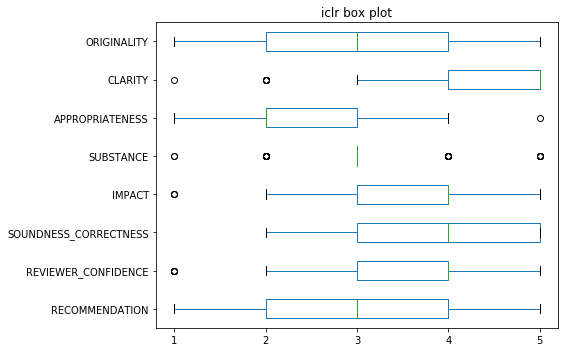

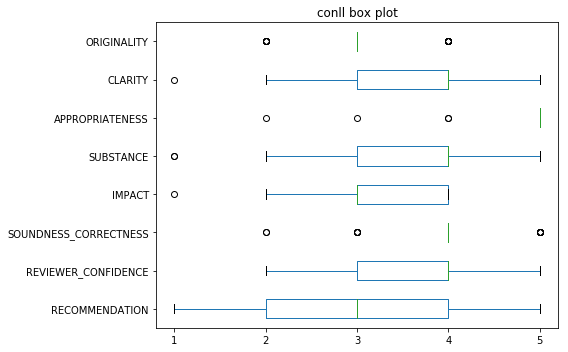

In [110]:
for venue in venues:
    venue_df = train_dataset[train_dataset.CONFERENCE==venue]
    df_aspects = venue_df[aspects_no_comments]
    df_aspects.plot.box(vert=False, title=venue + " box plot", figsize=(8,5))
    plt.xticks(np.arange(1,6,step=1))
    plt.tight_layout()
    plt.savefig(venue + "boxplot"+ ".jpg", dpi=300)

In [26]:
# train_dataset[aspects_with_conference].groupby('CONFERENCE').boxplot(figsize=(15, 12), vert=False, grid=False)
# plt.xticks(np.arange(1,6,step=1))
# plt.grid(False)

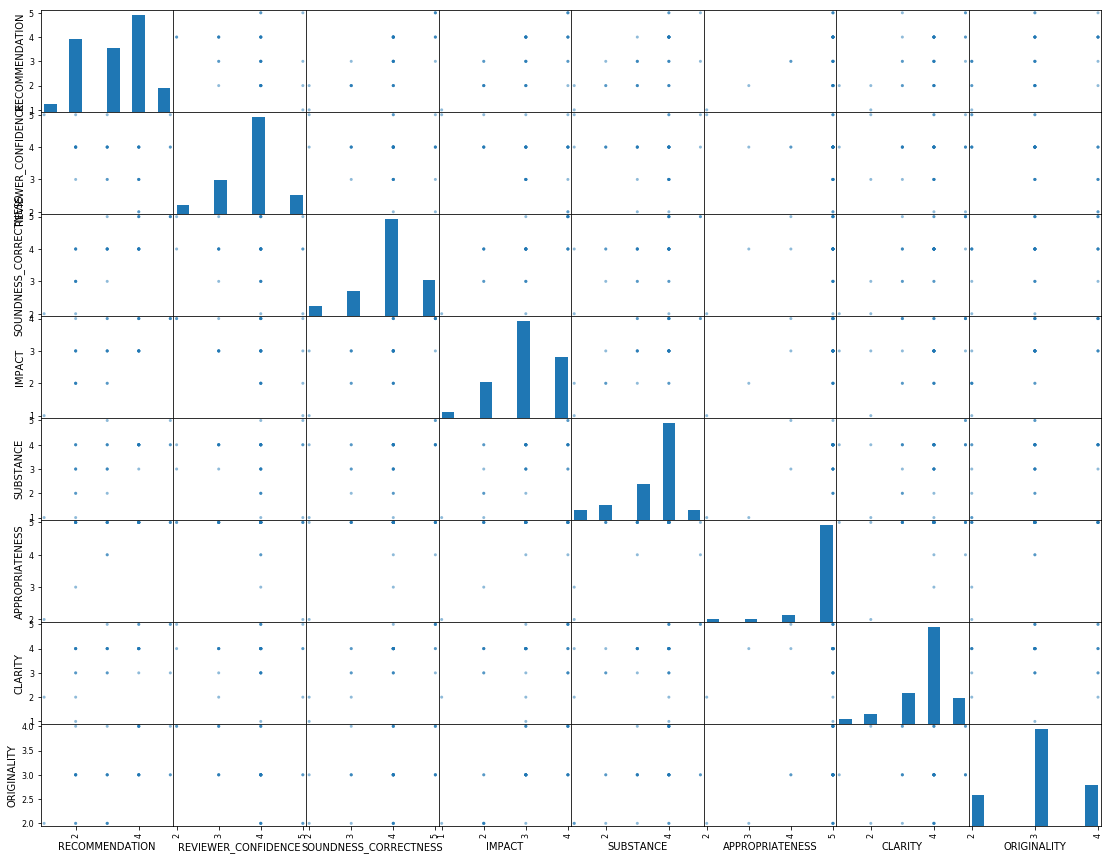

In [27]:
# from pandas.plotting import parallel_coordinates
from pandas.plotting import scatter_matrix

conll_df = train_dataset[train_dataset.CONFERENCE=='conll']

scatter_matrix(conll_df[aspects_no_comments], alpha=0.5, figsize=(19, 15))
print()

In [140]:
def plot_venues_aspect_mean(aspects, truncated_aspects, include_std=False):
    
    current_venues = np.unique(train_dataset['CONFERENCE'])
    venues_aspect_mean = []
    venues_aspect_std = []
    err_xs = []
    err_ys = []
    
    for i, venue in enumerate(current_venues):
        venues_aspect_mean.append([])
        venues_aspect_std.append([])
        err_xs.append([])
        err_ys.append([])
        filtered_venue_reviews = train_dataset[train_dataset.CONFERENCE==venue]
        
        for aspect_index, aspect in enumerate(aspects):
            filtered_aspect_reviews = filtered_venue_reviews[aspect]
            
            mean = np.mean(filtered_aspect_reviews)
            std = np.std(filtered_aspect_reviews)
            
            venues_aspect_mean[i].append(mean)
            venues_aspect_std[i].append(std)
            
            trunc_aspect = truncated_aspects[aspect_index]
            err_xs[i].append((trunc_aspect, trunc_aspect))
            err_ys[i].append((mean - std, mean + std))
           
    colors = ['blue', 'green', 'red']
    
    title = "" if include_std else "Venue aspects' mean score"

    # create a new plot with a log axis type
    p = figure(plot_width=500, plot_height=340, 
               title=title,
               x_range=truncated_aspects)
    
    for i, venue in enumerate(current_venues):
        p.line(truncated_aspects, venues_aspect_mean[i], line_width=2, color=colors[i], legend=current_venues[i])
        p.circle(truncated_aspects, venues_aspect_mean[i], size=8, color=colors[i], legend=current_venues[i])
        if include_std:
            p.multi_line(err_xs[i], err_ys[i], color=colors[i], legend=current_venues[i])
    
    p.y_range.start = 0
    p.y_range.end = 7.0
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None
    p.legend.location = "top_left"
    p.legend.orientation = "horizontal"
    p.legend.click_policy="hide"
#     p.xaxis.axis_label = "aspect"
    p.yaxis.axis_label = "score"
    show(p)

plot_venues_aspect_mean(aspects_no_comments, aspects_truncated_no_com)
plot_venues_aspect_mean(aspects_no_comments, aspects_truncated_no_com, True)

In [59]:
current_venues = np.unique(train_dataset['CONFERENCE'])
venue_len_mean = []
venue_len_std = []
for venue in current_venues:
    filtered_venue_reviews = train_dataset[train_dataset.CONFERENCE==venue]
    text_column = filtered_venue_reviews['comments']
    
    venue_reviews_len = []
    
    for review_text in text_column:
        venue_reviews_len.append(len(review_text.split()))
    
    mean = int(np.mean(venue_reviews_len))
    std = int(np.std(venue_reviews_len))
    
    venue_len_mean.append(mean)
    venue_len_std.append(std)
    
    min_len = np.min(venue_reviews_len)
    max_len = np.max(venue_reviews_len)
    
    print(venue, ": mean", mean, "std", std, "min_len", min_len, "max_len", max_len)

acl : mean 422 std 257 min_len 77 max_len 1456
conll : mean 413 std 202 min_len 111 max_len 1029
iclr : mean 285 std 179 min_len 8 max_len 1323


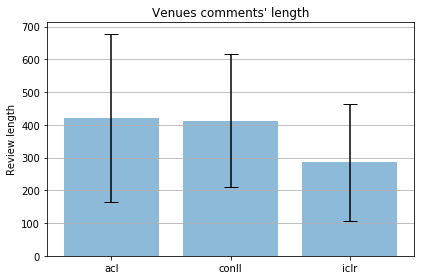

In [71]:
fig, ax = plt.subplots()
x_pos = np.arange(len(current_venues))

ax.bar(x_pos, venue_len_mean, yerr=venue_len_std, align='center', alpha=0.5, ecolor='black', capsize=7)
ax.set_ylabel('Review length')
ax.set_xticks(x_pos)
ax.set_xticklabels(current_venues)
ax.set_title("Venues comments' length")
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('venuecommentlength.jpg', dpi=300)
plt.show()

In [25]:
current_venues = np.unique(train_dataset['CONFERENCE'])
venue_len_dict = {}
for i, venue in enumerate(current_venues):
    filtered_venue_reviews = train_dataset[train_dataset.CONFERENCE==venue]
    text_column = filtered_venue_reviews['comments']
    
    venue_reviews_len = []
    
    for i in range(len(text_column)):
        review_text = text_column[i]
        venue_reviews_len.append(len(review_text.split()))
#         venue_len_dict[venue] = len(review_text.split())

    mean = int(np.mean(venue_reviews_len))
    std = int(np.std(venue_reviews_len))
    
    min_len = np.min(venue_reviews_len)
    max_len = np.max(venue_reviews_len)
    
    print(venue, ": mean", mean, "std", std, "min_len", min_len, "max_len", max_len)

acl : mean 2653 std 1602 min_len 472 max_len 8828
conll : mean 2563 std 1296 min_len 633 max_len 6310
iclr : mean 1782 std 1104 min_len 46.0 max_len 7922.0


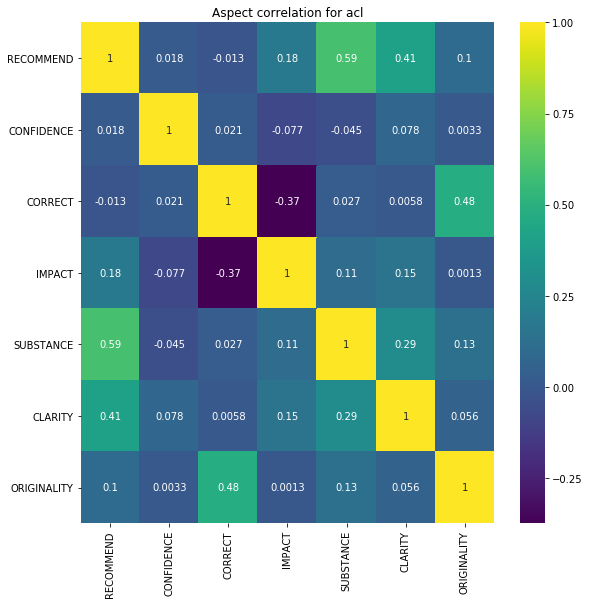

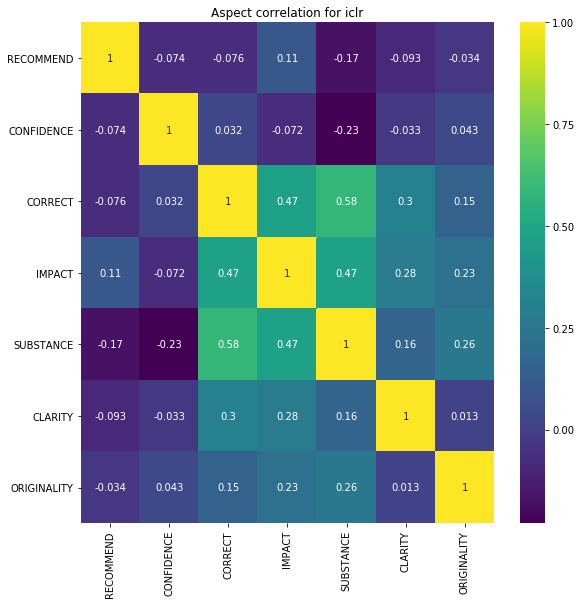

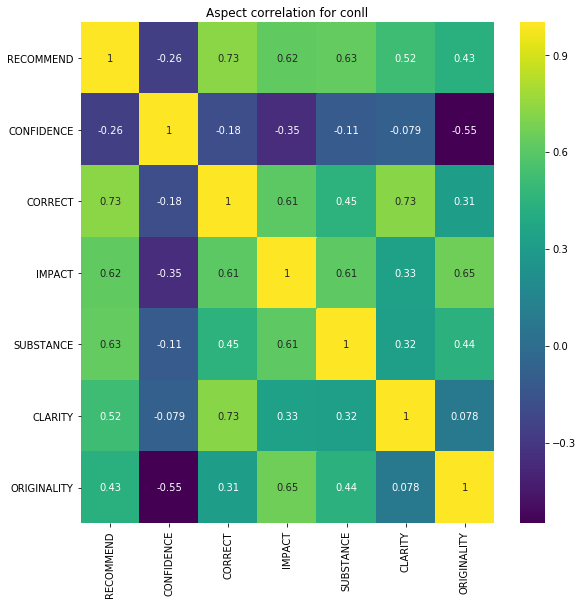

In [133]:
size = 8.5

for venue in venues:
    data = train_dataset.loc[train_dataset.CONFERENCE==venue]
    data = data[aspects_no_com_approp]    

    corrmat = data.corr()
    corrmat.columns = ['RECOMMEND', 'CONFIDENCE', 'CORRECT', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY']
    corrmat.index = ['RECOMMEND', 'CONFIDENCE', 'CORRECT', 'IMPACT', 'SUBSTANCE', 'CLARITY', 'ORIGINALITY']
    plt.figure(figsize=(size,size))
    plt.title("Aspect correlation for " + venue)
    g=sns.heatmap(corrmat,annot=True,cmap="viridis") 
    plt.tight_layout()
    plt.savefig(venue + "corrmat"+ ".jpg", dpi=300)

### Drop Nan for Dataset

In [22]:
train_dataset = train_dataset.dropna(subset=aspects_with_comments_no_approp)
print("Total reviews after filtering:", len(train_dataset))

Total reviews after filtering: 278


In [23]:
train_dataset = train_dataset[train_dataset.CONFERENCE=='acl']

In [24]:
print('ACL papers:',train_dataset[train_dataset.CONFERENCE=='acl'].shape[0])
print('ICLR papers:',train_dataset[train_dataset.CONFERENCE=='iclr'].shape[0])
print('CONLL papers:',train_dataset[train_dataset.CONFERENCE=='conll'].shape[0])

ACL papers: 242
ICLR papers: 0
CONLL papers: 0


In [144]:
train_dataset.head()

IMPACT  SUBSTANCE  APPROPRIATENESS  MEANINGFUL_COMPARISON  \
0     3.0        2.0              5.0                    3.0   
1     3.0        3.0              5.0                    3.0   
2     4.0        4.0              5.0                    4.0   
3     3.0        5.0              5.0                    3.0   
4     3.0        4.0              5.0                    4.0   

  PRESENTATION_FORMAT                                           comments  \
0              Poster  This paper compares different ways of inducing...   
1              Poster  - Strengths: An interesting and comprehensive ...   
2              Poster  - Strengths:\n\n - The paper is clearly writte...   
3   Oral Presentation  - Strengths:\n\nWhen introducing the task, the...   
4   Oral Presentation  - Strengths:\n\noriginality of the CORE evalua...   

   SOUNDNESS_CORRECTNESS  ORIGINALITY  is_meta_review  RECOMMENDATION  \
0                    5.0          5.0             NaN             2.0   
1                    5.0          5.0             NaN             3.0   
2                    3.0          3.0             NaN             4.0   
3                    3.0          3.0             NaN             5.0   
4                    4.0          4.0             NaN             4.0   

   CLARITY  REVIEWER_CONFIDENCE CONFERENCE  \
0      4.0                  3.0        acl   
1      5.0                  4.0        acl   
2      5.0                  5.0        acl   
3      5.0                  5.0        acl   
4      5.0                  3.0        acl   

                                            ABSTRACT  PAPER_ID  REPLICABILITY  \
0  Current state-of-the-art sentiment analysis te...       266            NaN   
1  Current state-of-the-art sentiment analysis te...       266            NaN   
2  Neural networks have recently shown promising ...       557            NaN   
3  Joint extraction of entities and relations is ...       222            NaN   
4  Text similarity measures are used in multiple ...       805            NaN   

  IS_META_REVIEW DATE TITLE OTHER_KEYS  RECOMMENDATION_UNOFFICIAL IS_ANNOTATED  
0            NaN  NaN   NaN        NaN                        NaN          NaN  
1            NaN  NaN   NaN        NaN                        NaN          NaN  
2            NaN  NaN   NaN        NaN                        NaN          NaN  
3            NaN  NaN   NaN        NaN                        NaN          NaN  
4            NaN  NaN   NaN        NaN                        NaN          NaN

In [145]:
plot_venues_aspect_mean(aspects_no_comments, aspects_truncated_no_com)
plot_venues_aspect_mean(aspects_no_com_approp, aspects_truncated_no_com_approp)

### Aspect grades distribution

In [204]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.core.properties import value

def aspect_grade_distribution(aspects, truncated_aspects, target_aspect="", target_grade=-1):
    grades = ['1', '2', '3', '4', '5']

    grade_dist = [[],[],[],[],[]]
            
    filtered_train_dataset = train_dataset
    title = "ACL aspect scores distribution "
    
    if target_aspect!="":
        title += "for " + target_aspect + "=" + str(target_grade)
        filtered_train_dataset = filtered_train_dataset[filtered_train_dataset[target_aspect] == target_grade]
    
    print("Total reviews:", len(filtered_train_dataset))
    title += " (Total reviews:" + str(len(filtered_train_dataset)) + ")" 
    for i, grade in enumerate(np.arange(1,6)):
        for aspect in aspects:
            grade_dist[i].append(len(filtered_train_dataset[filtered_train_dataset[aspect] == grade]))

    data = {'1' : grade_dist[0],  
            '2' : grade_dist[1], 
            '3' : grade_dist[2], 
            '4' : grade_dist[3], 
            '5' : grade_dist[4]}

    x = [(aspect, grade) for aspect in truncated_aspects for grade in grades]
    counts = sum(zip(data['1'], data['2'], data['3'], data['4'], data['5']), ()) # like an hstack

    source = ColumnDataSource(data=dict(x=x, counts=counts, grades=grades))

    p = figure(x_range=FactorRange(*x), plot_height=250, plot_width=900, 
               title=title)

    p.vbar(x='x', top='counts', legend="grades", width=1.0, source=source, line_color="white",
           fill_color=factor_cmap('x', palette=['#d73027', '#fc8d59', '#fee090', '#e0f3f8', '#91bfdb', '#4575b4'], factors=grades, start=1, end=2))

    p.y_range.start = 0
    p.x_range.range_padding = 0.05
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None
    p.legend.orientation = "horizontal"
    p.legend.location = "top_left"
    show(p)

In [205]:
aspect_grade_distribution(aspects_no_comments, aspects_truncated_no_com)

Total reviews: 242


In [206]:
for i in range(1,6):    
    aspect_grade_distribution(aspects_no_comments[1:], aspects_truncated_no_com[1:], 'RECOMMENDATION', i)

Total reviews: 6


Total reviews: 46


Total reviews: 64


Total reviews: 118


Total reviews: 8


### Aspect grades correlation

In [ ]:
train_dataset_filtered = train_dataset[aspects_no_com_approp]

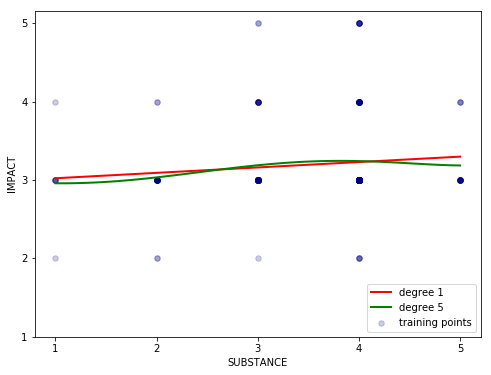

In [143]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def regression_correlation_plot(target_asepct, defining_aspect):
    # generate points used to plot
    x_plot = np.linspace(1, 5, 100)

    # generate points and keep a subset of them
    x = np.linspace(1, 5, 100)
    
    x = np.array(train_dataset_filtered[defining_aspect]).reshape(-1)
    y = np.array(train_dataset_filtered[target_asepct])

    # create matrix versions of these arrays
    X = x[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

    colors = ['red', 'green', 'blue', 'gold']
    lw = 2

    plt.figure(figsize=(8,6))
    plt.scatter(x, y, color='navy', alpha=0.2, s=30, marker='o', label="training points")

#     for count, degree in enumerate([1, 3, 5, 7]):
    for count, degree in enumerate([1, 5]):
        model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model.fit(X, y)
        y_plot = model.predict(X_plot)
        plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
                 label="degree %d" % degree)

    plt.legend(loc='lower right')
    
#     plt.title("Aspect correlation plot")
    plt.xlabel(defining_aspect)
    plt.ylabel(target_asepct)
    plt.xticks(np.arange(1,6))
    plt.yticks(np.arange(1,6))
#     plt.savefig(target_asepct + defining_aspect + ".jpg", dpi=300)    
    plt.show()

regression_correlation_plot('IMPACT', 'SUBSTANCE')

In [26]:
def truncate_float(number):
    return float("%.2f" % number)

In [56]:
import warnings
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.semi_supervised import LabelPropagation

warnings.filterwarnings('ignore')

def svm_model(X_train, X_test, y_train, y_test):
    clf5 = SVC(gamma='auto', C=1)
    clf5.fit(X_train, y_train)
    return clf5.score(X_test, y_test)
    
def lp_model(X_train, X_test, y_train, y_test):
    minus_one_labels = np.zeros(len(y_test)) - 1
    labels = np.r_[y_train, minus_one_labels]
    train_test_set = np.r_[X_train, X_test]
    label_prop_model = LabelPropagation()
    label_prop_model.fit(train_test_set, labels)
    return label_prop_model.score(X_test, y_test)


def get_predictions_for_aspects_combinations(consider_single_aspect=False):
    prediction_summary_data = []

    initial_infer_aspects = aspects_no_com_approp

    for target_aspect_index, target_aspect in enumerate(initial_infer_aspects):
    # target_aspect_index = 0
    # target_aspect = 'RECOMMENDATION'
        infer_aspects = np.delete(initial_infer_aspects, target_aspect_index)

        aspect_idx = np.arange(len(infer_aspects))
        aspect_idx_combinations = [list(combinations(aspect_idx, i+1)) for i in aspect_idx]

        y = np.array(train_dataset_filtered[target_aspect])

        current_best_score = 0
        current_aspects_for_best_score = []
        major_prediction = 0
        
        lp_current_best_score = 0
        lp_current_aspects_for_best_score = []
        
        for i in np.arange(len(aspect_idx_combinations)):
            for j in np.arange(len(aspect_idx_combinations[i])):
                aspects_combination = infer_aspects[list(aspect_idx_combinations[i][j])]
                
                X = np.array(train_dataset_filtered[aspects_combination])
                
                kf = KFold(n_splits=9)
                kf.get_n_splits(X)
                
                svm_acc_scores = []
                pl_acc_scores = []
                major_acc_scores = []
                
                for train_index, test_index in kf.split(X):                    
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]
                    
                    svm_prediction_score = svm_model(X_train, X_test, y_train, y_test)
                    
                    svm_acc_scores.append(svm_prediction_score)
                    
                    lp_prediction_score = lp_model(X_train, X_test, y_train, y_test)
                    
                    pl_acc_scores.append(lp_prediction_score)
                    
                    items,counts = np.unique(y_train, return_counts=True)
                    
                    major_acc_score = accuracy_score(np.ones(len(y_test)) * items[np.argmax(counts)] , y_test)
                    major_acc_scores.append(major_acc_score)
                
                svm_prediction_score = np.mean(svm_acc_scores)
                lp_prediction_score = np.mean(pl_acc_scores)
                major_score = np.mean(major_acc_scores)
                
                if truncate_float(svm_prediction_score) > truncate_float(current_best_score):
                    current_best_score = svm_prediction_score
                    current_aspects_for_best_score = aspects_combination
                    major_prediction = major_score
                
                if truncate_float(lp_prediction_score) > truncate_float(lp_current_best_score):
                    lp_current_best_score = lp_prediction_score
                    lp_current_aspects_for_best_score = aspects_combination
            
            if consider_single_aspect:
                break
        prediction_summary_data.append([target_aspect, current_best_score, lp_current_best_score, major_prediction, current_aspects_for_best_score, lp_current_aspects_for_best_score])
    
    return pd.DataFrame(prediction_summary_data, columns = ['aspect', 'best_score', 'lp_score', 'majority_vote', 'aspects', 'lp_aspects'])

In [57]:
pd.set_option('display.max_colwidth', 100)

df_single_aspect = get_predictions_for_aspects_combinations(True)
df_single_aspect

aspect  best_score  lp_score  majority_vote  \
0         RECOMMENDATION    0.603355  0.603355       0.488129   
1    REVIEWER_CONFIDENCE    0.578506  0.578506       0.578506   
2  SOUNDNESS_CORRECTNESS    0.718265  0.718265       0.350744   
3                 IMPACT    0.777145  0.777145       0.777145   
4              SUBSTANCE    0.570909  0.570909       0.570909   
5                CLARITY    0.441754  0.441754       0.437638   
6            ORIGINALITY    0.602564  0.602564       0.429725   

                   aspects               lp_aspects  
0              [SUBSTANCE]              [SUBSTANCE]  
1         [RECOMMENDATION]         [RECOMMENDATION]  
2            [ORIGINALITY]            [ORIGINALITY]  
3         [RECOMMENDATION]         [RECOMMENDATION]  
4    [REVIEWER_CONFIDENCE]    [REVIEWER_CONFIDENCE]  
5                 [IMPACT]                 [IMPACT]  
6  [SOUNDNESS_CORRECTNESS]  [SOUNDNESS_CORRECTNESS]

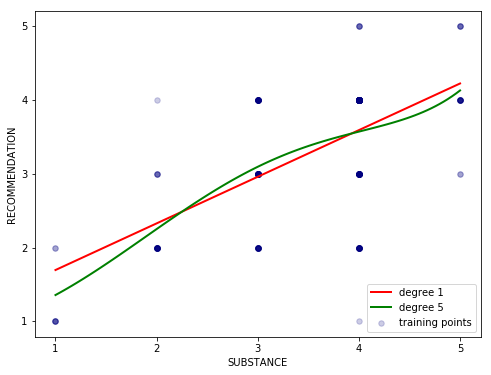

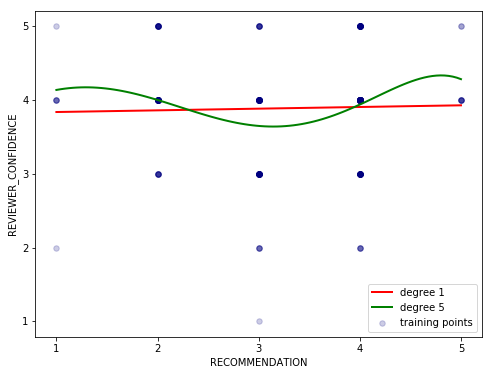

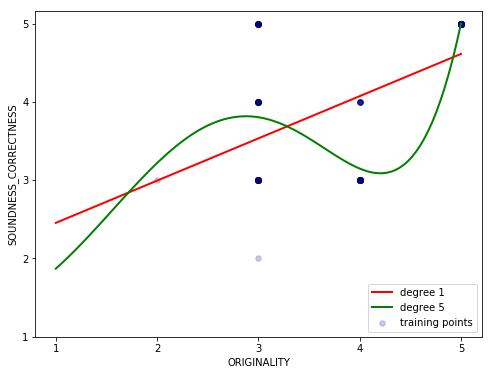

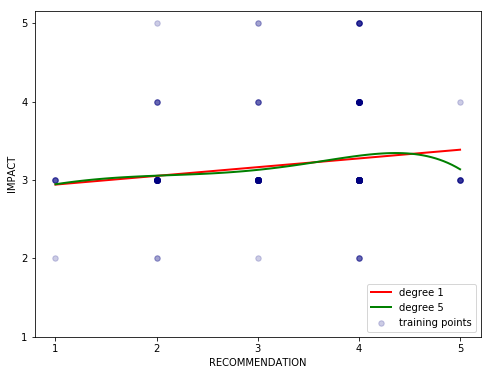

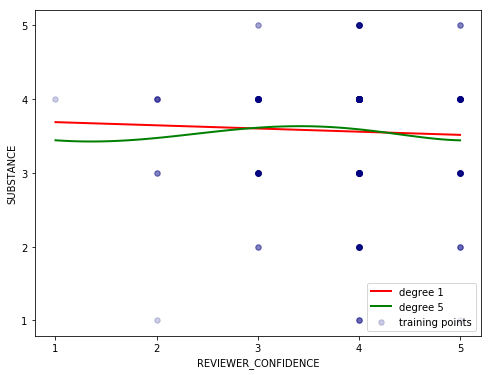

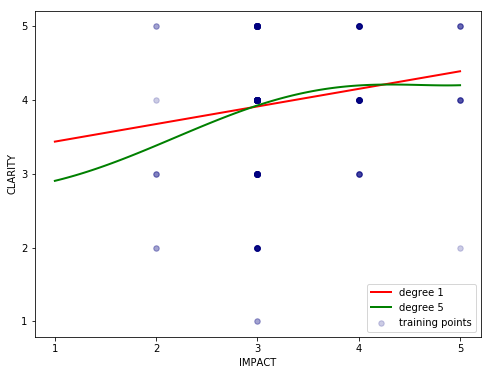

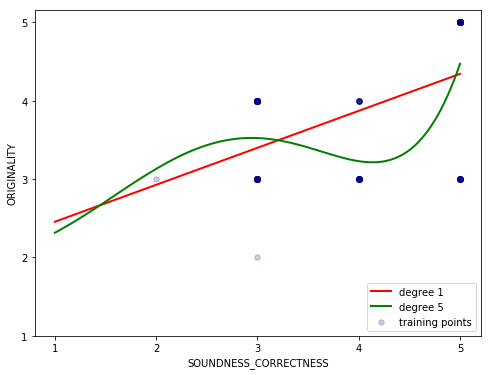

In [156]:
for (idx, row) in df_single_aspect[['aspect', 'aspects']].iterrows():
    target_aspect = row[0]
    defining_aspect = row[1][0]
    regression_correlation_plot(target_aspect, defining_aspect)

In [58]:
df_multiple_aspects = get_predictions_for_aspects_combinations()
df_multiple_aspects

aspect  best_score  lp_score  majority_vote  \
0         RECOMMENDATION    0.607312  0.603355       0.488129   
1    REVIEWER_CONFIDENCE    0.578506  0.578506       0.578506   
2  SOUNDNESS_CORRECTNESS    0.747072  0.747072       0.350744   
3                 IMPACT    0.777145  0.777145       0.777145   
4              SUBSTANCE    0.591643  0.607471       0.570909   
5                CLARITY    0.441754  0.454416       0.437638   
6            ORIGINALITY    0.680753  0.680753       0.429725   

                                              aspects  \
0                                [SUBSTANCE, CLARITY]   
1                                    [RECOMMENDATION]   
2                               [IMPACT, ORIGINALITY]   
3                                    [RECOMMENDATION]   
4  [RECOMMENDATION, REVIEWER_CONFIDENCE, ORIGINALITY]   
5                                            [IMPACT]   
6             [RECOMMENDATION, SOUNDNESS_CORRECTNESS]   

                                             lp_aspects  
0                                           [SUBSTANCE]  
1                                      [RECOMMENDATION]  
2                                 [IMPACT, ORIGINALITY]  
3                                      [RECOMMENDATION]  
4  [RECOMMENDATION, SOUNDNESS_CORRECTNESS, ORIGINALITY]  
5               [RECOMMENDATION, SOUNDNESS_CORRECTNESS]  
6               [RECOMMENDATION, SOUNDNESS_CORRECTNESS]

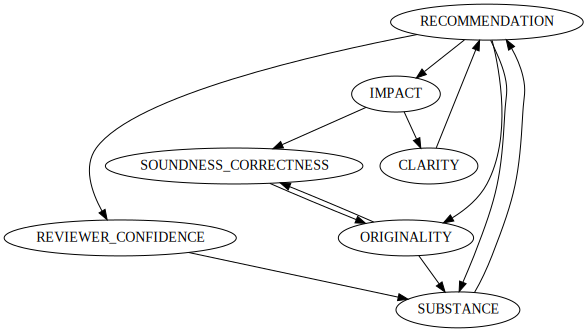

In [160]:
from graphviz import Digraph

ps = Digraph()
ps.graph_attr['rankdir'] = 'TD'

for asp in df_multiple_aspects.aspect:
    ps.node(asp)

for (idx, row) in df_multiple_aspects[['aspect', 'aspects']].iterrows():
    target_aspect = row[0]
    defining_aspects = row[1]
    for defining_aspect in defining_aspects:
        ps.edge(defining_aspect, target_aspect)

ps

In [153]:
ps.format = "png"
ps.render("smth")

'smth.png'

In [52]:
# http://www.webgraphviz.com/
# print("digraph g{rankdir=TD;")

# for (idx, row) in df[['aspect', 'aspects']].iterrows():
#     target_aspect = row[0]
#     defining_aspects = row[1]
#     for defining_aspect in defining_aspects:
#         print(defining_aspect, "->", target_aspect)

# print("}")

### Data splits

In [41]:
def df_to_csv(df, filename):
    df.to_csv(filename, index=False)
    print(filename, "saved!")

def filter_dataset(dataset):
    dataset = dataset.dropna(subset=aspects_with_abstract_no_com_approp)
#     dataset = dataset.dropna(subset=aspects_with_comments_abstract_no_approp)
#     dataset = dataset.dropna(subset=['comments', 'RECOMMENDATION'])
    dataset = dataset[dataset.CONFERENCE=='acl']
#     dataset = dataset[['comments', 'RECOMMENDATION']]

#     dataset = dataset[aspects_with_abstract_no_com_approp]
#     dataset.columns = aspects_with_comments_no_approp

#     convert grades to int
    dataset[aspects_no_com_approp] = dataset[aspects_no_com_approp].astype(int)
    return dataset

def prepare_csv_for_torchtext(train_dataset,
                              dev_dataset,
                              test_dataset,
                              train_dataset_filename,
                              dev_dataset_filename,
                              test_dataset_filename):
    
    df_to_csv(filter_dataset(train_dataset), train_dataset_filename)
    df_to_csv(filter_dataset(dev_dataset), dev_dataset_filename)
    df_to_csv(filter_dataset(test_dataset), test_dataset_filename)

In [168]:
train_dev_test_all_venues_ds = pd.concat([train_dataset, dev_dataset, test_dataset], sort=False)

unique_abstracts = train_dev_test_all_venues_ds[['ABSTRACT', 'CONFERENCE']]
unique_abstracts = unique_abstracts.dropna(subset=['ABSTRACT'])
unique_abstracts = unique_abstracts.drop_duplicates(['ABSTRACT'])
unique_abstracts.columns = ["text", "CONFERENCE"]
unique_abstracts['is_abstract'] = True

comments_df = train_dev_test_all_venues_ds[['comments', 'CONFERENCE']]
comments_df.columns = ["text", "CONFERENCE"]
comments_df['is_abstract'] = False

comments_abstract_train_dev_test_all_venues = pd.concat([comments_df, unique_abstracts], sort=False)
print(len(comments_abstract_train_dev_test_all_venues))
comments_abstract_train_dev_test_all_venues.head()

2230


/home/mihai/PycharmProjects/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


text CONFERENCE  is_abstract
0  This paper compares different ways of inducing...        acl        False
1  - Strengths: An interesting and comprehensive ...        acl        False
2  - Strengths:\n\n - The paper is clearly writte...        acl        False
3  - Strengths:\n\nWhen introducing the task, the...        acl        False
4  - Strengths:\n\noriginality of the CORE evalua...        acl        False

In [169]:
df_to_csv(comments_abstract_train_dev_test_all_venues, "lang_model_ds.csv")

lang_model_ds.csv saved!


In [170]:
train_dev_test_all_venues_ds = pd.concat([train_dataset, dev_dataset, test_dataset], sort=False)

tabular_ds = train_dev_test_all_venues_ds[aspects_with_comments_conf_no_approp]
tabular_ds[aspects_no_com_approp] = tabular_ds[aspects_no_com_approp].fillna(-1).astype(int).astype(str).replace('-1', np.nan)
print(len(tabular_ds))
tabular_ds.head()

/home/mihai/PycharmProjects/venv/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


1646


comments RECOMMENDATION  \
0  This paper compares different ways of inducing...              2   
1  - Strengths: An interesting and comprehensive ...              3   
2  - Strengths:\n\n - The paper is clearly writte...              4   
3  - Strengths:\n\nWhen introducing the task, the...              5   
4  - Strengths:\n\noriginality of the CORE evalua...              4   

  REVIEWER_CONFIDENCE SOUNDNESS_CORRECTNESS IMPACT SUBSTANCE CLARITY  \
0                   3                     5      3         2       4   
1                   4                     5      3         3       5   
2                   5                     3      4         4       5   
3                   5                     3      3         5       5   
4                   3                     4      3         4       5   

  ORIGINALITY CONFERENCE  
0           5        acl  
1           5        acl  
2           3        acl  
3           3        acl  
4           4        acl

In [171]:
df_to_csv(tabular_ds, "tabular_ds.csv")

tabular_ds.csv saved!


In [23]:
class Config(object):
    train_dataset_filename = "train_dataset.csv"
    dev_dataset_filename = "dev_dataset.csv"
    test_dataset_filename = "test_dataset.csv"
    dataset_path = "./"

general_config = Config()

In [24]:
general_config.train_dataset_filename

'train_dataset.csv'

In [25]:
# Create custom dev set
from sklearn.model_selection import train_test_split

filtered_train_set = filter_dataset(train_dataset)

train_dataset_split, dev_dataset_split = train_test_split(filtered_train_set, test_size=0.2, random_state=43)
len(train_dataset_split), len(dev_dataset_split)
# filtered_train_set.head()
# df_to_csv(train_dataset_split, general_config.train_dataset_filename)
# df_to_csv(dev_dataset_split, general_config.dev_dataset_filename)

(192, 48)

In [85]:
acl_dev_test = pd.concat([dev_dataset, test_dataset], sort=False)
filtered_acl_dev_test = filter_dataset(acl_dev_test)
len(filtered_acl_dev_test)
# df_to_csv(filtered_acl_dev_test, "acl_dev_test.csv")

27

In [86]:
filtered_train_set = filter_dataset(pd.concat([train_dataset, dev_dataset, test_dataset], sort=False))
# filtered_train_set = filter_dataset(train_dataset)

In [87]:
seed = 2
np.random.seed(seed)
dev_split_paper_ids = np.random.choice(list(set(filtered_train_set["PAPER_ID"])), 23, replace=False)

In [88]:
train_split_abstract_ds = filtered_train_set[~filtered_train_set.PAPER_ID.isin(dev_split_paper_ids)]
dev_split_abstract_ds = filtered_train_set[filtered_train_set.PAPER_ID.isin(dev_split_paper_ids)]

In [89]:
len(train_split_abstract_ds), len(dev_split_abstract_ds)

(216, 51)

In [90]:
train_split_abstract_ds = train_split_abstract_ds[aspects_with_abstract_no_com_approp]
train_split_abstract_ds.columns = aspects_with_comments_no_approp
train_split_abstract_ds

comments  RECOMMENDATION  \
0    Current state-of-the-art sentiment analysis te...               2   
1    Current state-of-the-art sentiment analysis te...               3   
3    Joint extraction of entities and relations is ...               5   
4    Text similarity measures are used in multiple ...               4   
5    In this paper, we present the gated self-match...               4   
6    In this paper, we present the gated self-match...               4   
7    Integrating text and knowledge into a unified ...               3   
8    Integrating text and knowledge into a unified ...               4   
9    Integrating text and knowledge into a unified ...               4   
10   We show that discourse structure, as defined b...               4   
11   We show that discourse structure, as defined b...               3   
12   This paper proposes KB-InfoBot - a multi-turn ...               4   
13   This paper presents an LDA-based model that ge...               4   
14   This paper presents an LDA-based model that ge...               4   
17   The number of word embedding models is growing...               2   
18   The number of word embedding models is growing...               4   
19   The number of word embedding models is growing...               4   
23   Volatility prediction—an essential concept in ...               2   
24   Volatility prediction—an essential concept in ...               2   
25   This paper proposes to tackle open-domain ques...               3   
26   This paper proposes to tackle open-domain ques...               3   
27   In this paper we study the problem of answerin...               4   
28   In this paper we study the problem of answerin...               3   
29   In this paper we study the problem of answerin...               4   
30   Natural language understanding (NLU) is a core...               2   
33   Type-level word embeddings use the same set of...               2   
34   While recent neural encoder-decoder models hav...               4   
35   While recent neural encoder-decoder models hav...               5   
36   Discourse structure analysis is helpful for th...               2   
37   Discourse structure analysis is helpful for th...               1   
..                                                 ...             ...   
233  We present the first parser for UCCA, a cross-...               4   
234  We present the first parser for UCCA, a cross-...               4   
238  Neural machine translation aims at building a ...               4   
239  Neural machine translation aims at building a ...               3   
244  The Long Short-Term Memory (LSTM) architecture...               2   
246  We introduce a new deep learning model for sem...               4   
247  We introduce a new deep learning model for sem...               4   
0    We propose a new, simple, yet effective framew...               2   
1    We propose a new, simple, yet effective framew...               2   
2    Neural network models have shown their promisi...               4   
3    Neural network models have shown their promisi...               4   
4    We investigate object naming, which is an impo...               4   
5    We investigate object naming, which is an impo...               4   
6    We study response selection for multi-turn con...               4   
7    Word embeddings have become widely-used in doc...               4   
8    Word embeddings have become widely-used in doc...               4   
11   Restricted non-monotonicity has been shown ben...               4   
0    Causation is a psychological tool of humans to...               2   
1    Causation is a psychological tool of humans to...               3   
2    Knowing the quality of reading comprehension (...               4   
3    Chunks (or phrases) once played a pivotal role...               4   
4    Chunks (or phrases) once played a pivotal role...               4   
5    The performance of Japanese predicate argumen

In [91]:
dev_split_abstract_ds = dev_split_abstract_ds[aspects_with_abstract_no_com_approp]
dev_split_abstract_ds.columns = aspects_with_comments_no_approp
dev_split_abstract_ds

comments  RECOMMENDATION  \
2    Neural networks have recently shown promising ...               4   
15   We propose a new A* CCG parsing model in which...               4   
16   We propose a new A* CCG parsing model in which...               4   
20   Recent work on embedding ontology concepts has...               2   
21   Recent work on embedding ontology concepts has...               2   
22   Recent work on embedding ontology concepts has...               2   
31   Finding the correct hypernyms for entities is ...               4   
32   Finding the correct hypernyms for entities is ...               4   
39   Knowledge bases are important resources for a ...               3   
49   In this paper, we present a novel framework fo...               4   
50   In this paper, we present a novel framework fo...               3   
66   We investigate neural techniques for end-to-en...               4   
67   We investigate neural techniques for end-to-en...               4   
81   Sarcasm is a form of speech in which speakers ...               3   
82   Sarcasm is a form of speech in which speakers ...               3   
83   Sarcasm is a form of speech in which speakers ...               4   
87   Harnessing the statistical power of neural net...               5   
88   Harnessing the statistical power of neural net...               4   
135  Word embeddings are used with success for a va...               4   
136  Word embeddings are used with success for a va...               2   
137  Word embeddings are used with success for a va...               2   
138  Sememes are minimum semantic units of word mea...               4   
139  Sememes are minimum semantic units of word mea...               3   
140  Sememes are minimum semantic units of word mea...               4   
147  This paper explores several techniques for enh...               3   
148  This paper explores several techniques for enh...               2   
149  This paper explores several techniques for enh...               3   
161  In this paper, we propose a new model for pred...               3   
162  In this paper, we propose a new model for pred...               2   
163  Interactive topic models are powerful tools fo...               4   
164  Interactive topic models are powerful tools fo...               4   
166  Reading comprehension in NLP refers to the abi...               4   
167  Reading comprehension in NLP refers to the abi...               2   
168  Reading comprehension in NLP refers to the abi...               2   
182  We present in this paper a novel framework for...               4   
183  We present in this paper a novel framework for...               4   
184  We present in this paper a novel framework for...               4   
214  Pre-trained word embeddings learned from unlab...               4   
215  Pre-trained word embeddings learned from unlab...               3   
235  Learning commonsense knowledge from natural la...               3   
236  Learning commonsense knowledge from natural la...               4   
237  Learning commonsense knowledge from natural la...               4   
240  While end-to-end neural machine translation (N...               4   
241  While end-to-end neural machine translation (N...               3   
242  While end-to-end neural machine translation (N...               4   
243  Automatically evaluating the quality of dialog...               4   
245  We presents in this paper our approach for mod...               3   
9    We propose two novel methodologies for the aut...               4   
10   We propose two novel methodologies for the aut...               3   
13   We propose a local coherence model based on a ...               4   
14   We propose a local coherence model based on a ...               3   

     REVIEWER_CONFIDENCE  SOUNDNESS_CORRECTNESS  IMPACT  SUBSTANCE  CLARITY  \
2                      5                      3       4          4        5   
15                     5               

In [59]:
# filtered_acl_dev_test = filtered_acl_dev_test[aspects_with_abstract_no_com_approp]
# filtered_acl_dev_test.columns = aspects_with_comments_no_approp
# filtered_acl_dev_test

In [77]:
df_to_csv(train_split_abstract_ds, "train_ds_" + str(seed)+ ".csv")
df_to_csv(dev_split_abstract_ds, "test_ds_" + str(seed)+ ".csv")
# df_to_csv(train_split_abstract_ds, "abstract_" + general_config.train_dataset_filename)
# df_to_csv(dev_split_abstract_ds, "abstract_" + general_config.dev_dataset_filename)
# df_to_csv(filtered_acl_dev_test, "abstract_" + "acl_dev_test.csv")

train_ds_1.csv saved!
dev_ds_1.csv saved!


In [113]:
filtered_train_set = filter_dataset(pd.concat([train_dataset, dev_dataset, test_dataset], sort=False))

seed = 9
np.random.seed(seed)
dev_split_paper_ids = np.random.choice(list(set(filtered_train_set["PAPER_ID"])), 25, replace=False)

train_split_abstract_ds = filtered_train_set[~filtered_train_set.PAPER_ID.isin(dev_split_paper_ids)]
dev_split_abstract_ds = filtered_train_set[filtered_train_set.PAPER_ID.isin(dev_split_paper_ids)]

print(len(train_split_abstract_ds), len(dev_split_abstract_ds))

218 49


In [114]:
train_split_abstract_ds = train_split_abstract_ds[aspects_with_abstract_no_com_approp]
train_split_abstract_ds.columns = aspects_with_comments_no_approp
train_split_abstract_ds

dev_split_abstract_ds = dev_split_abstract_ds[aspects_with_abstract_no_com_approp]
dev_split_abstract_ds.columns = aspects_with_comments_no_approp
dev_split_abstract_ds

df_to_csv(train_split_abstract_ds, "train_ds_" + str(seed)+ ".csv")
df_to_csv(dev_split_abstract_ds, "test_ds_" + str(seed)+ ".csv")

train_ds_9.csv saved!
test_ds_9.csv saved!


In [42]:
# Create custom dev set
from sklearn.model_selection import train_test_split

filtered_iclr_train_set = filter_dataset(train_dataset)

iclr_trian_ds, iclr_dev_ds = train_test_split(filtered_iclr_train_set, test_size=0.15, random_state=43)

print(len(iclr_trian_ds), len(iclr_dev_ds))

# df_to_csv(iclr_trian_ds, "iclr_rec_train_ds.csv")
# df_to_csv(iclr_dev_ds, "iclr_rec_dev_ds.csv")

920 163
iclr_rec_trian_ds.csv saved!
iclr_rec_dev_ds.csv saved!


In [43]:
iclr_dev_test = pd.concat([dev_dataset, test_dataset], sort=False)
filtered_iclr_dev_test = filter_dataset(iclr_dev_test)

len(filtered_iclr_dev_test)

# df_to_csv(filtered_iclr_dev_test, "iclr_rec_dev_test.csv")

iclr_rec_dev_test saved!


In [56]:
prepare_csv_for_torchtext(train_dataset, 
                          dev_dataset, 
                          test_dataset,
                          general_config.train_dataset_filename,
                          general_config.dev_dataset_filename,
                          general_config.test_dataset_filename)

train_dataset.csv saved!
dev_dataset.csv saved!
test_dataset.csv saved!
